In [1]:

%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Test of stationarity
from statsmodels.tsa.stattools import adfuller
# Linear Optimization
from scipy.optimize import minimize
# import Portfolio class
import yfinance as yf

from src_v2 import Portfolio

[*********************100%%**********************]  10 of 10 completed


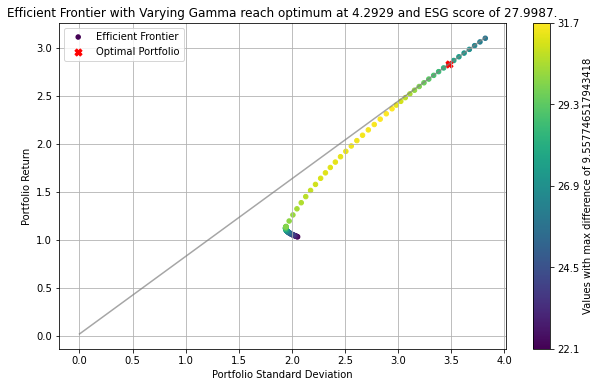

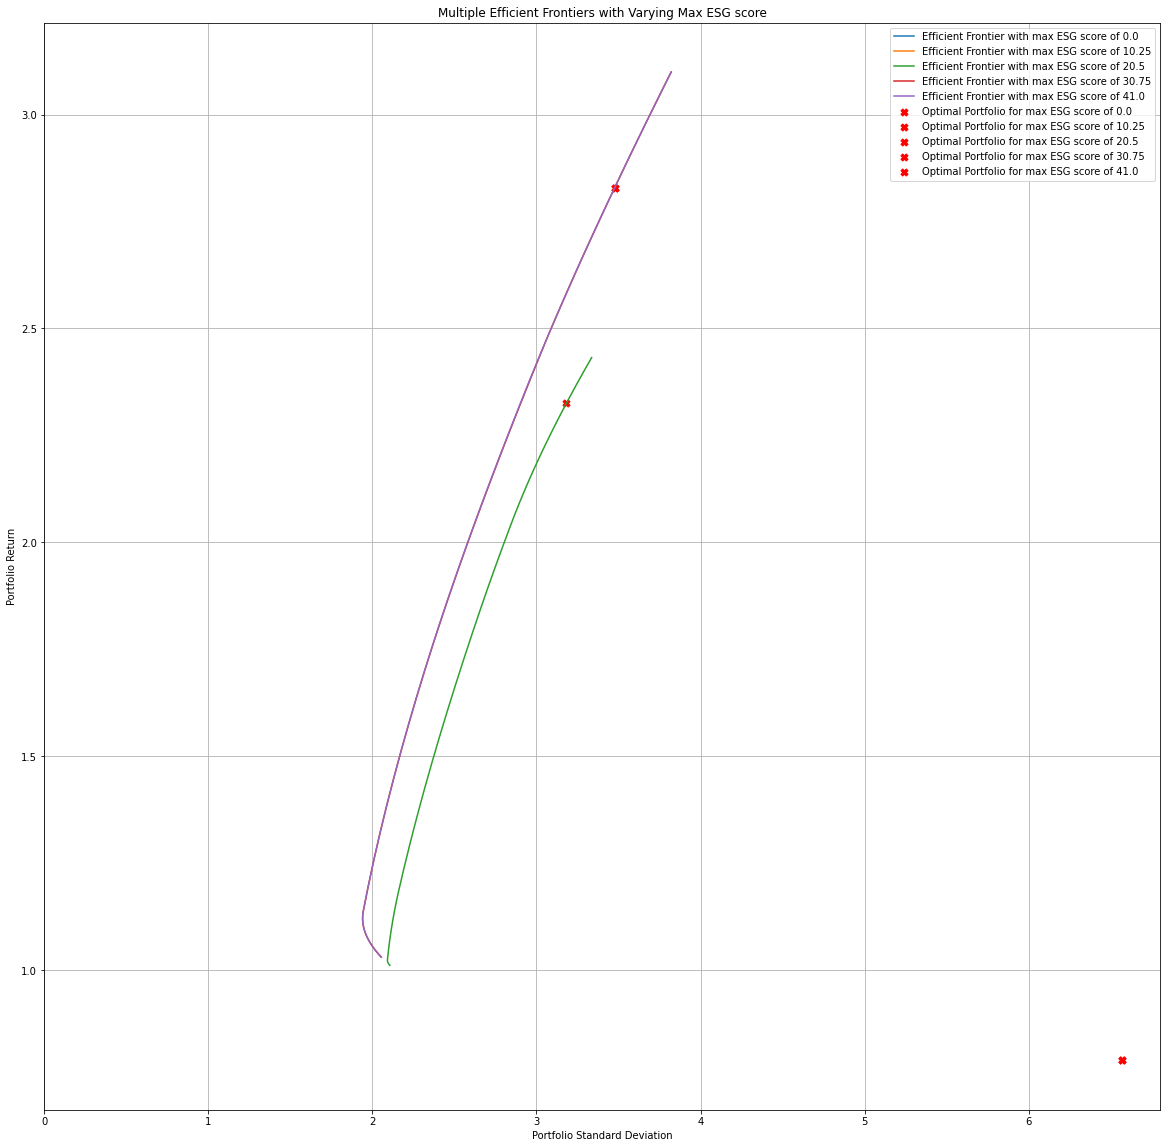

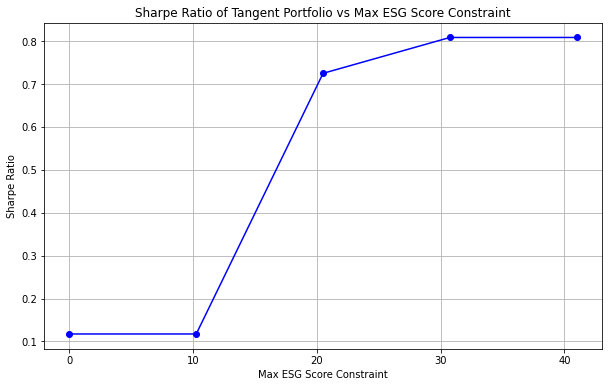

In [2]:
TICKERS = ['JPM', 'BP', 'AAPL','JNJ','MSFT','PG','V','HD','GE','PFE']
START_DATE = '2019-01-01'
END_DATE = '2023-12-01'
INTERVAL = '1mo' # '1d', '1y'
# Sustainalytics scores of the stocks (the smaller the better)
SUSTAINALYTICS_SCORES = [17.2, 34.6, 29.3, 24, 15, 29, 17, 13, 41, 25]


Y_PORTFOLIO=Portfolio(TICKERS,
                      START_DATE,
                      END_DATE,
                      INTERVAL,
                      SUSTAINALYTICS_SCORES,'Y')

                      
Y_PORTFOLIO.download_data()

MAX_ESG_SCORE = 40
# propostion of risk-free asset in the portfolio
ALPHA = 0.9
# risk-free rate treasury bill 3 months
RISK_FREE_RATE = 0.018
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100) 

MAX_ESG_SCORES = list(np.linspace(0, np.max(SUSTAINALYTICS_SCORES), 5))

Y_PORTFOLIO.plot_efficient_frontier(GAMMA_VALUES, 
                                  ALPHA,
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,best_in_class_method=False)

Y_PORTFOLIO.plot_efficient_frontier_multiple_max_esg_scores(GAMMA_VALUES,
                                                            ALPHA,
                                                            risk_free_rate=RISK_FREE_RATE,
                                                            max_esg_scores=MAX_ESG_SCORES,
                                                            fully_invested=True,
                                                            long_only=True,best_in_class_method=False,
                                                            with_optimal_portfolio=True,
                                                            with_linear_tangent=False)
Y_PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        ALPHA,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,best_in_class_method=False)    

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


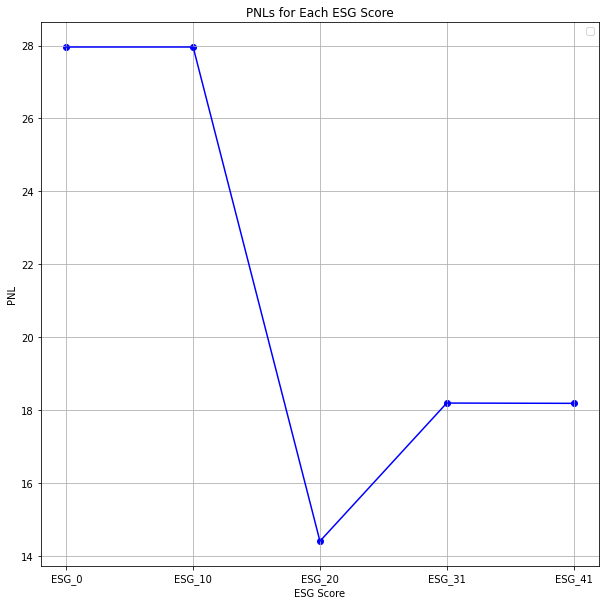

,ESG_0,ESG_10,ESG_20,ESG_31,ESG_41
PNL,27.959728,27.959729,14.401394,18.190920,18.183256
PNL_EW,0.185211,0.185211,0.185211,0.185211,0.185211


In [5]:
Y_PORTFOLIO.get_pnl_backtest(GAMMA_VALUES,ALPHA,risk_free_rate=0,
                            max_esg_scores=[np.inf],
                            fully_invested=True,
                            long_only=True,best_in_class_method=False,
                            with_optimal_portfolio=False,
                            with_linear_tangent=False,opt_problem='Markowitz',with_esg_score=True,esg_scores=MAX_ESG_SCORES)

# BIG PTF (31 assets)

In [6]:
DICT = {'AMZN':30, 
        'TSLA':25.3, 
        'WMT':25.3, 
        'DIS':15.7, 
        'F':23.2, 
        'PG':27.9, 
        'COST':26.3, 
        'KO':24.9, 
        'PEP':22.1,
        'XOM':41.6, 
        'CVX':36.8,
        'BP':36.0, 
        'TTE':27.1, 
        'JPM':30.1, 
        'V':16.4, 
        'MA':16.6, 
        'BAC':28.3, 
        'JNJ':23.9, 
        'PFE':18.7, 
        'MRK':22.1, 
        'ABT':25.0, 
        'UNH':15.3, 
        'GE':36.9, 
        'BA':39.4, 
        'MMM':41.0, 
        'CAT':36.3, 
        'HON':28.1, 
        'AAPL':17.2, 
        'MSFT':15.2, 
        'GOOGL':24.1, 
        'NVDA':13.5}

TICKERS=DICT.keys()

In [7]:
import json

# Open the JSON file
with open('/Users/elbezaharon/PA3A project/msci_esg_ratings.json') as f:
    # Load the JSON data
    data = json.load(f)

# Print the data

df={}
for ticker in TICKERS:
    df[ticker]=data[ticker]['controversy_info']

df=pd.DataFrame(df)
mapping = {'Green': 1, 'Yellow': 2, 'Orange': 3}
df = df.replace(mapping)
controversy_scores,controversy_index=list(round(df.mean())),list(df.columns)


[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed


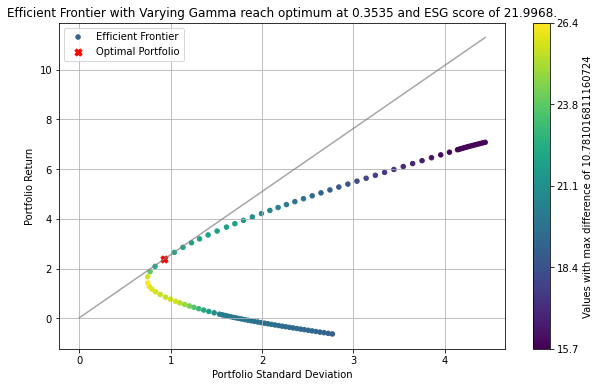

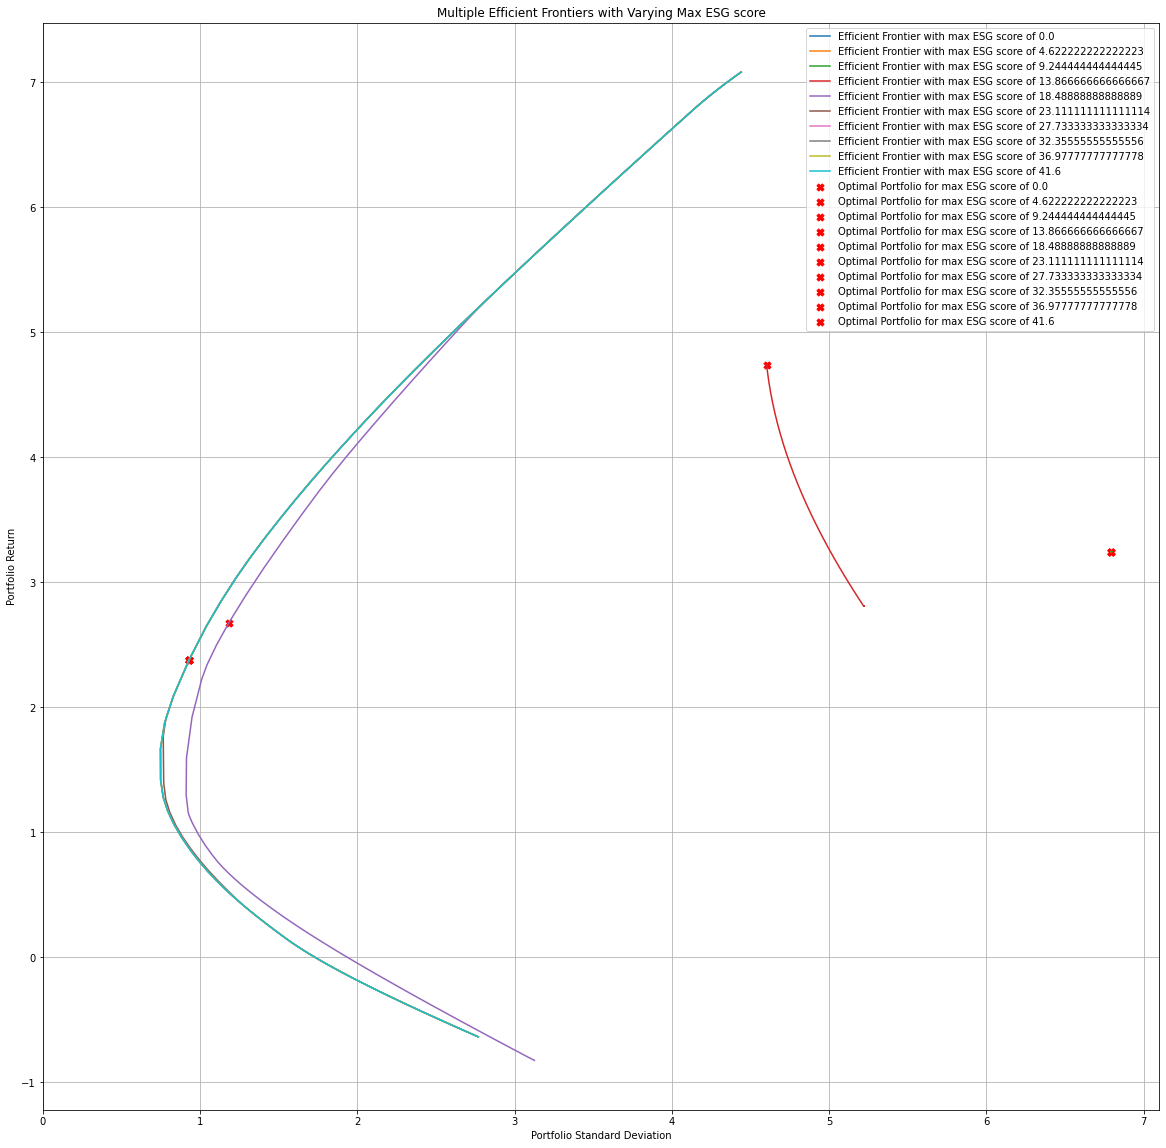

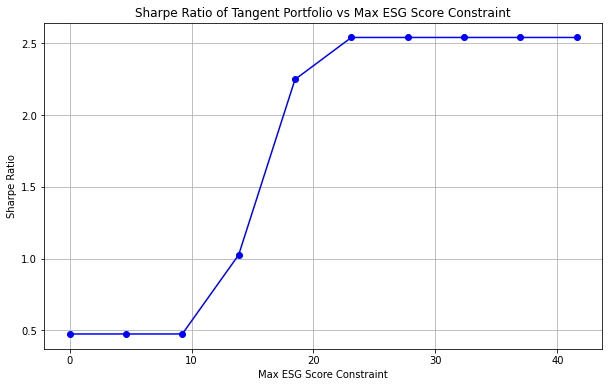

In [8]:
TICKERS = list(DICT.keys())
SUSTAINALYTICS_SCORES = list(DICT.values())

PORTFOLIO_BIG = Portfolio(TICKERS,
                            '2019-01-01',
                            '2024-01-01',
                            '1mo',
                            SUSTAINALYTICS_SCORES,
                            'Y')

# Maximum ESG score constraints
MAX_ESG_SCORE=25
MAX_ESG_SCORES = list(np.linspace(np.min(SUSTAINALYTICS_SCORES), np.max(SUSTAINALYTICS_SCORES), 10))
# risk-free rate
RISK_FREE_RATE = 0
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


PORTFOLIO_BIG.download_data()



START_DATE = '2019-01-01'
END_DATE = '2023-12-01'
INTERVAL = '1mo' # '1d', '1y'
# Sustainalytics scores of the stocks (the smaller the better)


BIG_PORTFOLIO=Portfolio(TICKERS,
                      START_DATE,
                      END_DATE,
                      INTERVAL,
                      SUSTAINALYTICS_SCORES,'Y')

                      
BIG_PORTFOLIO.download_data()

MAX_ESG_SCORE = 40
# propostion of risk-free asset in the portfolio
ALPHA = 0.9
# risk-free rate treasury bill 3 months
RISK_FREE_RATE = 0.018
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100) 

MAX_ESG_SCORES = list(np.linspace(0, np.max(SUSTAINALYTICS_SCORES), 10))

BIG_PORTFOLIO.plot_efficient_frontier(GAMMA_VALUES, 
                                  ALPHA,
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,best_in_class_method=False)

BIG_PORTFOLIO.plot_efficient_frontier_multiple_max_esg_scores(GAMMA_VALUES,
                                                            ALPHA,
                                                            risk_free_rate=RISK_FREE_RATE,
                                                            max_esg_scores=MAX_ESG_SCORES,
                                                            fully_invested=True,
                                                            long_only=True,best_in_class_method=False,
                                                            with_optimal_portfolio=True,
                                                            with_linear_tangent=False)
BIG_PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        ALPHA,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,best_in_class_method=False)    

[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


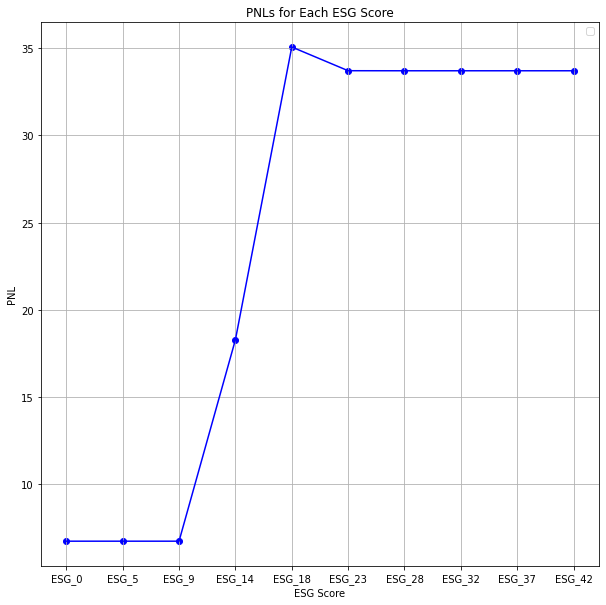

,ESG_0,ESG_5,ESG_9,ESG_14,ESG_18,ESG_23,ESG_28,ESG_32,ESG_37,ESG_42
PNL,6.751541,6.751545,6.751541,18.290976,35.062072,33.703575,33.700499,33.700499,33.700499,33.700499
PNL_EW,0.170775,0.170775,0.170775,0.170775,0.170775,0.170775,0.170775,0.170775,0.170775,0.170775


In [34]:
BIG_PORTFOLIO.get_pnl_backtest(GAMMA_VALUES,ALPHA,risk_free_rate=0,
                            max_esg_scores=[np.inf],
                            fully_invested=True,
                            long_only=True,best_in_class_method=False,
                            with_optimal_portfolio=False,
                            with_linear_tangent=False,opt_problem='Markowitz',with_esg_score=True,esg_scores=MAX_ESG_SCORES)

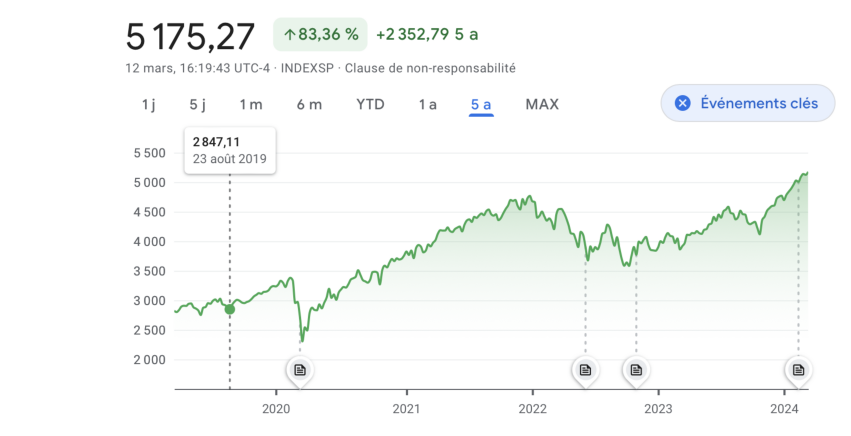

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
# Open the PNG image file
image = Image.open("Capture d’écran 2024-03-12 à 21.20.26.png")

# Convert the image to a numpy array
image_array = plt.imread("Capture d’écran 2024-03-12 à 21.20.26.png")

# Display the image using matplotlib
plt.imshow(image_array)
plt.axis('off')  # Turn off axis
plt.show()

# INCERTITUDE

In [13]:
import json

# Open the JSON file
with open('/Users/elbezaharon/PA3A project/msci_esg_ratings.json') as f:
    # Load the JSON data
    data = json.load(f)

# Print the data

df={}
for ticker in TICKERS:
    df[ticker]=data[ticker]['controversy_info']

df=pd.DataFrame(df)
mapping = {'Green': 1, 'Yellow': 2, 'Orange': 3}
df = df.replace(mapping)
controversy_scores,controversy_index=list(round(df.mean())),list(df.columns)


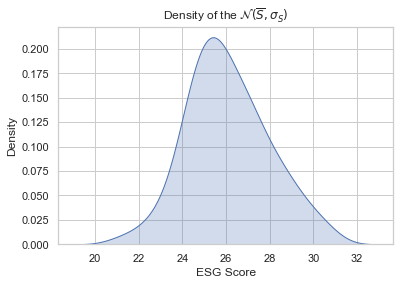

In [20]:
import seaborn as sns
import random 


mean=np.mean(list(DICT.values()))
vol=np.mean(list(controversy_scores))
normal_samples = np.random.normal(mean, vol, 100)
mean=np.mean(list(DICT.values()))
vol=np.max(list(controversy_scores))
sns.set(style="whitegrid")
sns.kdeplot(normal_samples, shade=True)
plt.title('Density of the '+r'$\mathcal{N}(\overline{S},\sigma_S)$')
plt.xlabel('ESG Score')
plt.ylabel('Density')
plt.show()

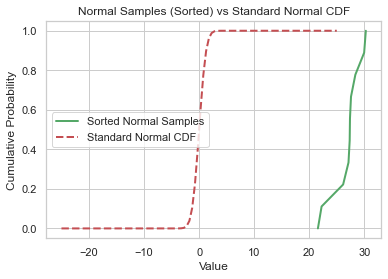

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# mean=np.mean(list(DICT.values()))
# vol=np.mean(list(DICT_CONTR.values()))

# # Generate random samples from a normal distribution with the specified mean and volatility
normal_samples = np.random.normal(mean, vol, 10)
normal_samples.sort()
# Sort the samples
normal_samples_sorted = np.sort(normal_samples)

# Create a standard normal distribution
x = np.linspace(-25, 25, 100)
y = norm.cdf(x)

# Plot the sorted normal samples against the standard normal CDF
plt.plot(normal_samples_sorted, np.linspace(0, 1, 10), 'g-', linewidth=2, label='Sorted Normal Samples')
plt.plot(x, y, 'r--', linewidth=2, label='Standard Normal CDF')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Normal Samples (Sorted) vs Standard Normal CDF')
plt.legend()

plt.show()


[*********************100%%**********************]  31 of 31 completed


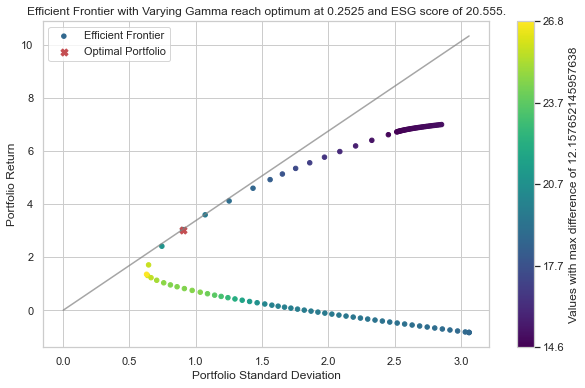

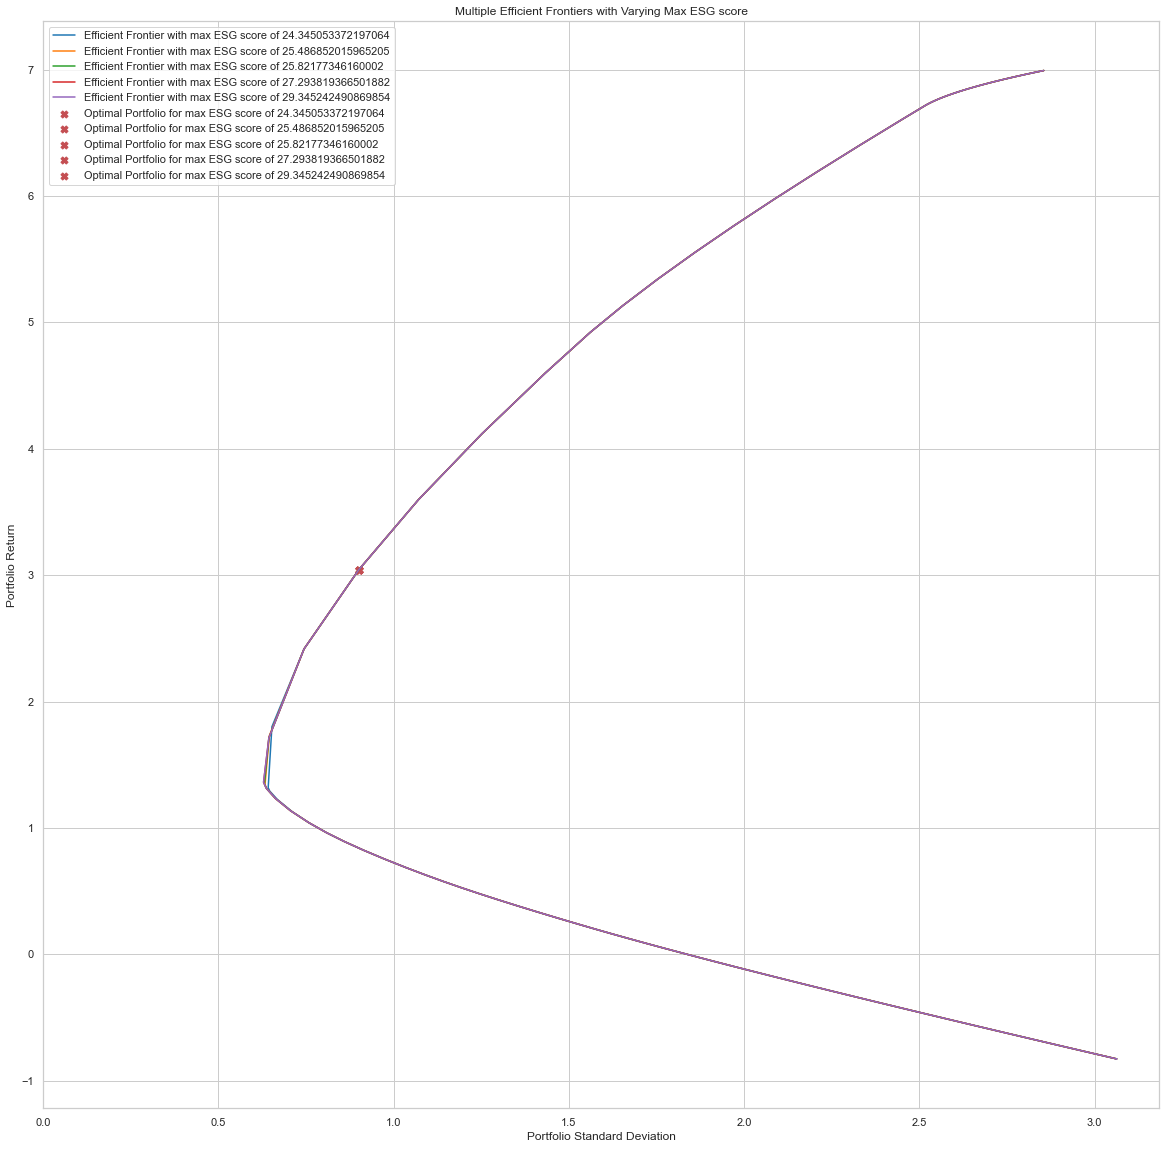

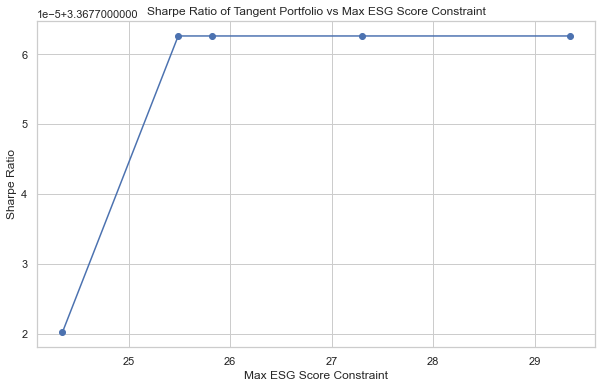

In [21]:

TICKERS = list(DICT.keys())
SUSTAINALYTICS_SCORES = list(DICT.values())


PORTFOLIO_BIG = Portfolio(TICKERS,
                            '2020-01-01',
                            '2024-01-01',
                            '1mo',
                            SUSTAINALYTICS_SCORES,
                            'Y')

# Maximum ESG score constraints
MAX_ESG_SCORE=40
normal_samples.sort()

random_elements = random.sample(list(normal_samples), 5)
random_elements.sort()
MAX_ESG_SCORES = list(random_elements)
# risk-free rate
RISK_FREE_RATE = 0
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


PORTFOLIO_BIG.download_data()

# propostion of risk-free asset in the portfolio
ALPHA = 0.9
# risk-free rate
RISK_FREE_RATE = 0.01
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100) 

PORTFOLIO_BIG.plot_efficient_frontier(GAMMA_VALUES, 
                                  ALPHA,
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)

PORTFOLIO_BIG.plot_efficient_frontier_multiple_max_esg_scores(GAMMA_VALUES,
                                                            ALPHA,
                                                            risk_free_rate=RISK_FREE_RATE,
                                                            max_esg_scores=MAX_ESG_SCORES,
                                                            fully_invested=True,
                                                            long_only=True,
                                                            with_optimal_portfolio=True,
                                                            with_linear_tangent=False)
PORTFOLIO_BIG.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        ALPHA,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True)                                                     

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


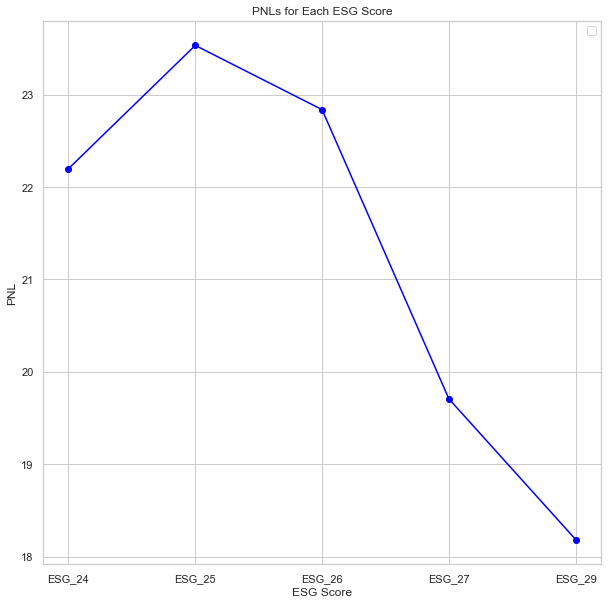

,ESG_24,ESG_25,ESG_26,ESG_27,ESG_29
PNL,22.199086,23.534473,22.839209,19.706976,18.183372
PNL_EW,0.185211,0.185211,0.185211,0.185211,0.185211


In [22]:
Y_PORTFOLIO.get_pnl_backtest(GAMMA_VALUES,ALPHA,risk_free_rate=0,
                            max_esg_scores=[np.inf],
                            fully_invested=True,
                            long_only=True,best_in_class_method=False,
                            with_optimal_portfolio=False,
                            with_linear_tangent=False,opt_problem='Markowitz',with_esg_score=True,esg_scores=MAX_ESG_SCORES)